### Dec 11th 2015 Riddler: What's the Best Way to Drop a Smartphone 
***

The Dec 11th 2015 Riddler from [FiveThirtyEight](https://fivethirtyeight.com/features/whats-the-best-way-to-drop-a-smartphone/) asks you to determine the optimal way to test maximum drop-height of a smartphone.  

> You work for a tech firm developing the newest smartphone that supposedly can survive falls from great heights. Your firm wants to advertise the maximum height from which the phone can be dropped without breaking.

> You are given two of the smartphones and access to a 100-story tower from which you can drop either phone from whatever story you want. If it doesn’t break when it falls, you can retrieve it and use it for future drops. But if it breaks, you don’t get a replacement phone.

> Using the two phones, what is the minimum number of drops you need to ensure that you can determine exactly the highest story from which a dropped phone does not break? (Assume you know that it breaks when dropped from the very top.) What if, instead, the tower were 1,000 stories high?

It seems like the optimal strategy is based on dissection.  As a **First Pass**, suppose you break up the 100 stories into intervals of $n$ floors.  You then drop the first phone from floors in increasing integer multiples of $n$ until the first phone breaks, i.e. floors $n\ell$ for $\ell = 1, 2, \ldots, \lfloor 99/n \rfloor$ (we use $99$ for the max because we know that the phone breaks when dropped from the $100^\textrm{th}$ floor and so we never need to test floor $100$).  

Suppose that the phone breaks on floor $n\ell_{break}$.  We then start dropping the second phone from floor $n(\ell_{break}-1)+1$ and increase a floor at a time until the second phone breaks.  

We need to figure out which is the worst case break-height for this strategy.  It would probably be helpful to work through a concrete example to gain some intuition.  To make things not too easy let's pick $n=9$ since $9 \not\mid 100$. 

**Example**: Let $n=9$, then we'll drop the first phone from floors $9, 18, 27, \ldots, 90, 99$.  It should be clear that the worst break-height for this strategy would be floor $98$.  This would require $11$ tests before the first phone breaks (on floor 99) and then $8$ tests starting from floor $91$ up until $98$ when the second phone breaks, for a grand total of $11+8 = 19$ tests.    

**General Case**: For a fixed integer $n$ the worst-case break floor will be $n\lfloor 99/n\rfloor -1$ and will require $\lfloor 99/n\rfloor + n -1$ tests in the worst-case scenario. 

**Determining Optimal $n$**: To determine the optimal $n$ we need only determine the value of $n \in [1,100)$ that minimizes $\lfloor 99/n\rfloor +n -1$.  Since this function is not continuous in $n$ we'll be lazy and plot the worst-case number of tests for each $n$ and pick the smallest. To be more general we'll also input the height of the building as a parameter.  

In [74]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373"}

def worst_case_tests(h=100):
    cases = [np.floor((h-1)/n).astype(int) + n - 1 for n in xrange(1,h)]
    best_case = np.argmin(cases)+1
    min_tests = np.min(cases)
    
    report = "optimal when n = " + str(best_case) + " with " + str(min_tests) + " tests required in worst case"
    
    fig = plt.figure(figsize=(16,5))
    ax = fig.add_subplot(111)    
    plt.plot(range(1,h), cases, color=mycolors["blue"])
    plt.scatter([best_case], [min_tests], color=mycolors["blue"], marker="o", s=50, label=report)
    plt.legend(loc="lower right", prop={'size':16})
    
    plt.xlim([0,h])
    plt.ylim([0,h+5])
    
    plt.xticks(list(plt.xticks()[0]) + [best_case])
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.tick_params(axis='both', which='minor', labelsize=16)
    
    plt.title("worst-case required tests for a given interval", fontsize=16)
    plt.xlabel(r"interval length $n$", fontsize=16)
    plt.ylabel("worst-case required tests", fontsize=16)

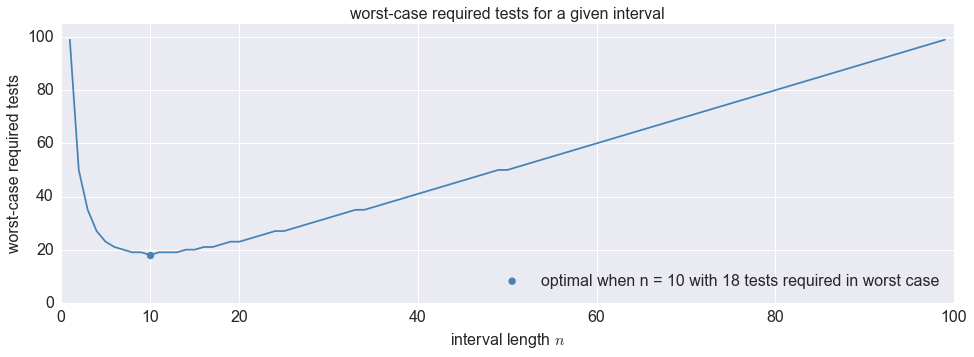

In [77]:
worst_case_tests(h=100)

**Second Pass**: OK, so the unsatisfying thing about the fixed-interval strategy is that the worst case scenario is always towards the top of the building, and by the nature of the strategy will require more drop tests than if the break-height was in the building.  

It would be nice if we could organize the intervals so that no matter where the break-height is we can find it in roughly the same number of tests (on average).  So how could we accomplish this?  It's pretty clear that we're going to have to use non-uniform intervals.  It's also clear that we want the spacing of the intervals to _decrease_ as we move up the building, since a break-height towards of the top of the building requires more end-point checks before we get to it. 

Let $m$ be the first floor that we check on our way up the building.  Note that if it was the case that the break-height was $m-1$ then finding it would require $m$ tests (the first phone breaks when testing floor $m$, then we do a linear scan of floors $1, \ldots, m-1$ with the second phone). 

Now, suppose that the break-height was in the next interval up the building.  We'd like to choose the next test floor so that covering the second interval requires the same number of tests as covering the first interval.  Since we already have to do the test at floor $m$ we need the linear scan of the second interval to have 1 fewer floors to balance things out.  Thus the second floor to check should be floor $2m-1$.  Here the worst-case break-height is floor $2m-2$.  To find this we would test floor $m$, test floor $2m-1$ (where the phone breaks), and then test floors $m+1, \ldots, 2m-2$, for a grand total of $1 + 1 + m-2 = m$ tests. 

OK, so we start to get the idea.  The end-point floors are of the form $m, 2m-1, 3m-2, \ldots$ 

The question now is: How do we choose $m$?  Well, there's this embarrassing detail that because the intervals shrink as we go up the building, at some point we'll have zero floors between interval endpoints.  This would probably be bad.  To avoid this, we want to choose $m$ so that right when we run out of floors in our intervals, we're at the top of the building.  Therefore, we want to choose $m$ such that    

$$
m + (m-1) + \cdots + 2 + 1 \geq 100 
$$

Using the formula for the sum of consecutive integers we arrive at 

$$
\frac{m(m+1)}{2} \geq 100
$$

Of course, this inequality has many solutions.  We're interested in the smallest integer $m$ that satisfies the inequality (since, remember, $m$ is the worst-case required tests, which we're trying to optimize).  In the case where the building has $100$ floors the smallest integer solution to the inequality is $m = 14$ (which, notice, is $4$ tests fewer than the optimal case we found for the uniform-interval strategy above).   

In general, for a building of height $H$ we want to find the smallest integer $m$ satisfying 

$$
\frac{m(m+1)}{2} \geq H
$$

For instance, if $H=1000$ then the smallest $m$ that works is $m=45$.  Thus with two phones, we could find the break-height of the phone in a 1000 floor building in at most $45$ drop tests. 